In [60]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
df=pd.read_csv('../titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [46]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


## Check for null rows

In [47]:
null_counts = df.isna().sum() #or isnull()

# Print out the count of null values in each column
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64


## Drop null values

In [52]:
df=df.dropna()

## Fill null values with median

In [49]:
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)

In [50]:
null_counts = df.isnull().sum()

# Print out the count of null values in each column
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64


In [61]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [62]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

print(X.shape)
print(y.shape)

(889, 7)
(889,)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 7)
(178, 7)
(711,)
(178,)


In [65]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [66]:
pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, pred))

0.7584269662921348


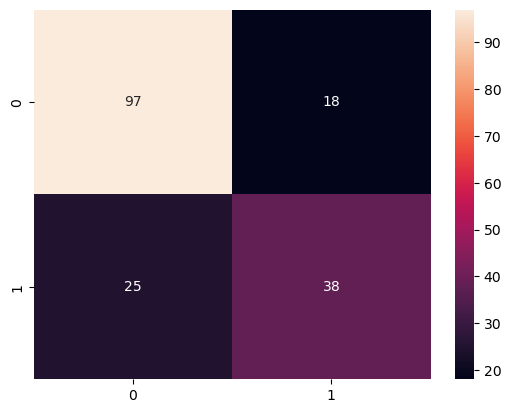

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()